## Etape 1 : Initialisation des modules Python

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

import sys
print(sys.path)
sys.path.append('1-Projet')
import ep.etools as ept

fit_verbosity = 1


['/Users/rky/Documents/GitHub/Machine-Learning/5-Fidle - CNN/CNN', '/Users/rky/miniforge3/envs/tf-M1/lib/python310.zip', '/Users/rky/miniforge3/envs/tf-M1/lib/python3.10', '/Users/rky/miniforge3/envs/tf-M1/lib/python3.10/lib-dynload', '', '/Users/rky/miniforge3/envs/tf-M1/lib/python3.10/site-packages']


## Etape 2 : Récupération des données

depuis Keras on charge les train_set et test_set de la dataset MNIST

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",x_test.shape)
print("y_test  : ",y_test.shape)

x_train :  (60000, 28, 28)
y_train :  (60000,)
x_test  :  (10000, 28, 28)
y_test  :  (10000,)


## Etape 3 : Préparation des données

* on calcul moyenne et écart-type
* on normalise pour obtenir un dataset de moyenne zéro et d'écart-type 0.

dans le cas présent on divise simplement par le maxi qui doite être 255 !

In [3]:
xmax=x_train.max()
x_train = x_train / xmax
x_test  = x_test  / xmax

print('Aprés normalisation  : Min={}, max={}'.format(x_train.min(),x_train.max()))

Aprés normalisation  : Min=0.0, max=1.0


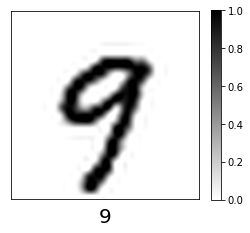

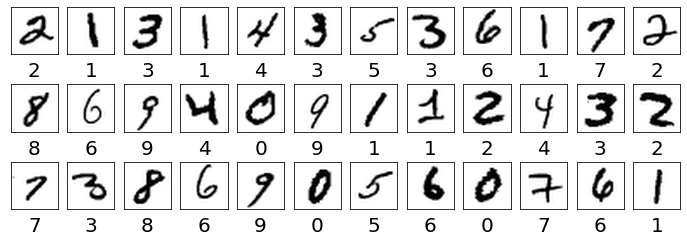

In [4]:
ept.plot_images(x_train,y_train , [45],  x_size=5,y_size=5, colorbar=True) #, save_as='01-one-digit')
# plt.imshow(x_train[0], cmap='Blues')
ept.plot_images(x_train, y_train, range(5,41), columns=12, save_as='02-many-digits')


## Etape 4 - Création du model
Les informations se trouvent ci-aprés : 
 - [Optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
 - [Activation](https://www.tensorflow.org/api_docs/python/tf/keras/activations)
 - [Loss](https://www.tensorflow.org/api_docs/python/tf/keras/losses)
 - [Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)

In [5]:
hidden1 = 16
hidden2 = 16

model = keras.Sequential([
    keras.layers.Input((28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(hidden1, activation='relu'),
    keras.layers.Dense(hidden2, activation='relu'),
    keras.layers.Dense(10,      activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

2023-08-16 14:33:32.157308: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-16 14:33:32.157984: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



## Etape 5 : Entrainement du Model

In [6]:
batch_size = 512
epochs = 16

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose= fit_verbosity,
                    validation_data=(x_test, y_test))

Epoch 1/16


2023-08-16 14:33:36.849977: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-08-16 14:33:37.132930: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


118/118 [==============================] - 3s 9ms/step - loss: 1.1347 - accuracy: 0.6803 - val_loss: 0.5051 - val_accuracy: 0.8674
Epoch 2/16
  1/118 [..............................] - ETA: 0s - loss: 0.5611 - accuracy: 0.8516

2023-08-16 14:33:39.695988: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


118/118 [==============================] - 1s 6ms/step - loss: 0.4232 - accuracy: 0.8829 - val_loss: 0.3504 - val_accuracy: 0.9032
Epoch 3/16
118/118 [==============================] - 1s 6ms/step - loss: 0.3346 - accuracy: 0.9056 - val_loss: 0.3111 - val_accuracy: 0.9104
Epoch 4/16
118/118 [==============================] - 1s 7ms/step - loss: 0.2976 - accuracy: 0.9166 - val_loss: 0.2800 - val_accuracy: 0.9196
Epoch 5/16
118/118 [==============================] - 1s 7ms/step - loss: 0.2756 - accuracy: 0.9218 - val_loss: 0.2619 - val_accuracy: 0.9265
Epoch 6/16
118/118 [==============================] - 1s 6ms/step - loss: 0.2601 - accuracy: 0.9261 - val_loss: 0.2483 - val_accuracy: 0.9302
Epoch 7/16
118/118 [==============================] - 1s 6ms/step - loss: 0.2476 - accuracy: 0.9294 - val_loss: 0.2433 - val_accuracy: 0.9314
Epoch 8/16
118/118 [==============================] - 1s 6ms/step - loss: 0.2377 - accuracy: 0.9322 - val_loss: 0.2315 - val_accuracy: 0.9337
Epoch 9/16
118/11

## Etape 6 : On évalue le Model

### 6.1/ Résultat final Loss & Accuracy

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss     :', score[0])
print('Test accuracy :', score[1])

Test loss     : 0.20104116201400757
Test accuracy : 0.9409999847412109


### 6.2/ Vitesse d'apprentissage

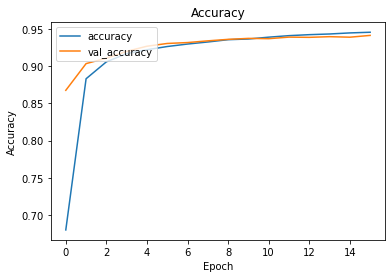

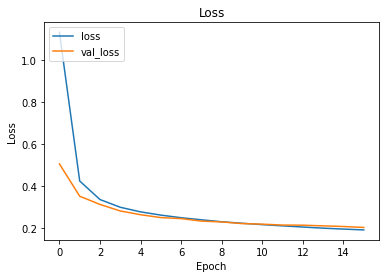

In [8]:
ept.plot_history(history, figsize=(6,4), save_as='03-history')

### 6.3/ Quelques examples

 85/313 [=======>......................] - ETA: 0s

2023-08-16 14:34:07.075206: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


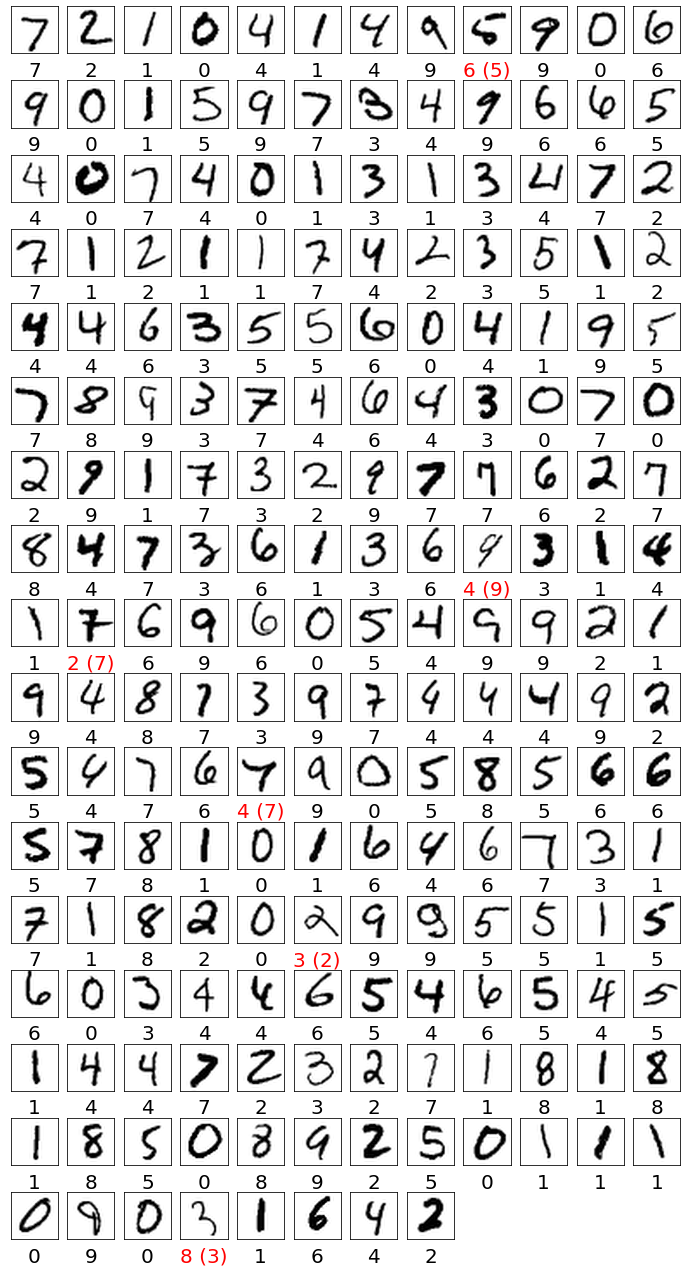

In [9]:
y_sigmoid = model.predict(x_test)
y_pred    = np.argmax(y_sigmoid, axis=-1)

ept.plot_images(x_test, y_test, range(0,200), columns=12, x_size=1, y_size=1, y_pred=y_pred, save_as='04-predictions')

### 7.4/ Quelques erreurs

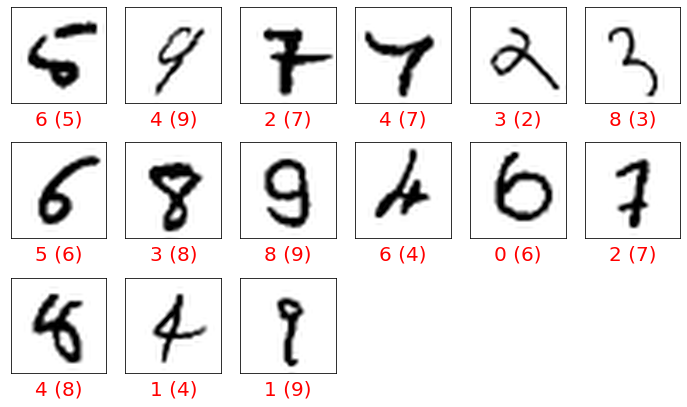

In [10]:
errors = [i for i in range(len(x_test)) if y_pred[i] != y_test[i]]
errors = errors[:min(28, len(errors))]
ept.plot_images(x_test, y_test, errors[:15], columns=6,
                x_size=2, y_size=2, y_pred=y_pred, save_as='05-some-errors')


### 7.5/ La matrice de confusion

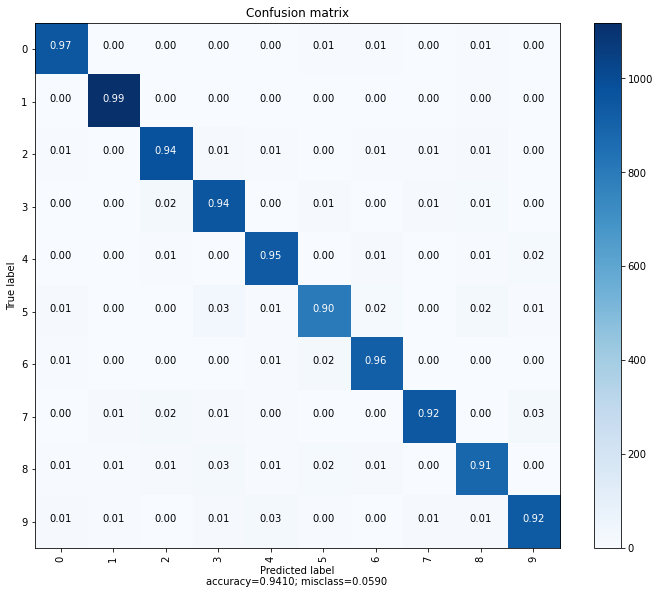

In [11]:
ept.plot_confusion_matrix(y_test,y_pred,range(10),normalize=True, save_as='06-confusion-matrix')